In [151]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import mplcyberpunk as mplnk
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.api import GLM

In [64]:
dataset = load_diabetes()

In [65]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [66]:
dataset.target.shape

(442,)

In [67]:
df = pd.concat([df, pd.Series(dataset.target)], axis=1).rename(columns={0 : 'target'})
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [68]:
features = df[df.columns[:-1]]
target = df[['target']]

In [69]:
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [70]:
target.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [71]:
pca = PCA(n_components=1)
features_decompose = pca.fit_transform(features)

In [72]:
features_decompose.shape

(442, 1)

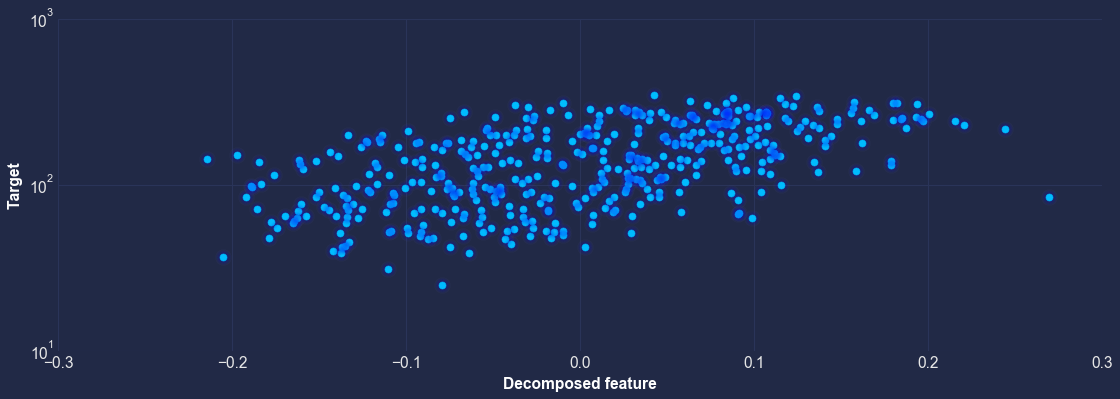

In [148]:
plt.style.use('cyberpunk')
font_dict = {
    'color': 'white',
    'fontsize': 14,
    'fontweight': 'bold'
}
plt.figure(figsize=(15, 5))
plt.yscale('log')
plt.scatter(x=features_decompose, y=target, color='aqua', s=40)
plt.xlabel('Decomposed feature', fontdict=font_dict)
plt.ylabel('Target', fontdict=font_dict)
mplnk.make_scatter_glow()
plt.show()

In [127]:
pca.n_components = 2
features_decompose_pair = pca.fit_transform(features)

In [139]:
features_decompose_pair.shape

array([-0.13468668,  0.06526327])

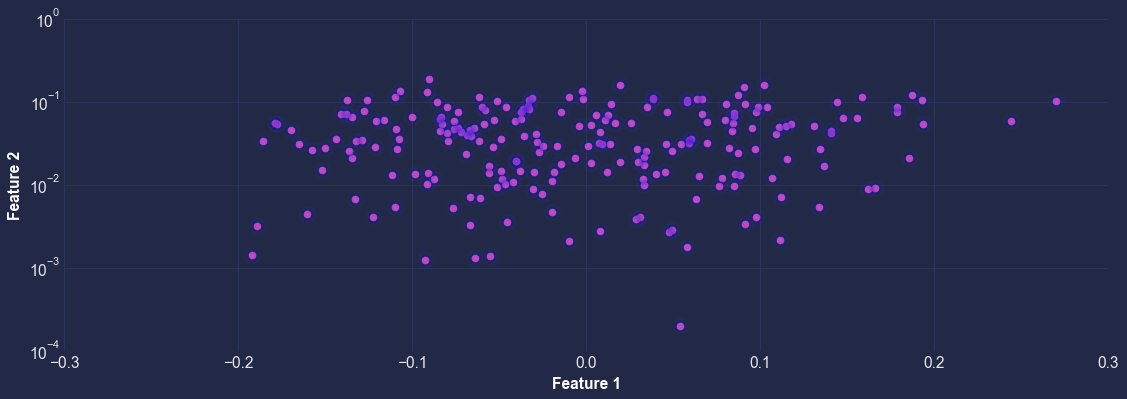

In [150]:
plt.figure(figsize=(15, 5))
plt.yscale('log')
plt.scatter(x=features_decompose_pair[:, 0], y=features_decompose_pair[:, 1], color='hotpink', s=40)
plt.xlabel('Feature 1', fontdict=font_dict)
plt.ylabel('Feature 2', fontdict=font_dict)
mplnk.make_scatter_glow()
plt.show()

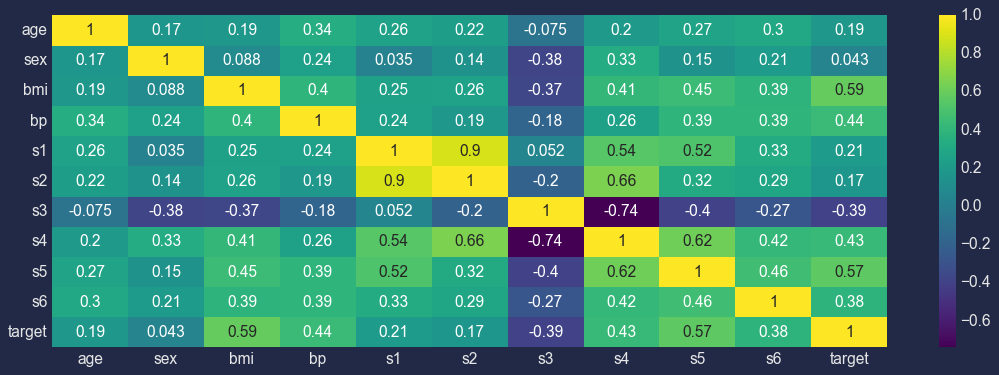

In [143]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.yticks(rotation=0)
plt.show()

In [122]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [123]:
class ConditionalTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, transformer, include=True) -> None:
        super().__init__()
        self.include = include
        self.transformer = transformer
    
    def fit(self, x, y=None):
        if not self.include:
            return self
        self.transformer.fit(x, y)
    
    def transform(self, x, y=None):
        if not self.include:
            return x
        return self.tranformer.transform(x, y)

In [ ]:
class ConditionalNormalizer(ConditionalTransformer):
    
    def __init__(self, include=True, norm='l2') -> None:
        super().__init__(transformer=Normalizer(norm=norm), include=include)

In [ ]:
num_pipeline = Pipeline([
    ('Impute', SimpleImputer())
    ('Scale', RobustScaler()),
    ('Outlier', IsolationForest(contamination=0.5)),
    ('Normalize', ConditionalNormalizer())
])